In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

# Explore Database

In [5]:
#Inspector Gadget
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
    
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
    
# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)



In [9]:
# reflect the tables and view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table by establishing variables
measurements = Base.classes.measurement
stations = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Last date = most recent date (using order by desc)
recent_date = session.query(measurements.date).order_by(measurements.date.desc()).first()
print(recent_date)

('2017-08-23',)


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
# Date 1 year ago from recent_date, the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
year_ago


datetime.date(2016, 8, 23)

In [14]:
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame
last_year = session.query(measurements.date, measurements.prcp).\
    filter(measurements.date >= year_ago).all()

for date in last_year:
    print(date)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

('2017-08-17', 0.01)
('2017-08-18', 0.06)
('2016-08-23', 0.7)
('2016-08-24', 1.45)
('2016-08-25', 0.11)
('2016-08-27', None)
('2016-08-28', 2.07)
('2016-08-29', 0.9)
('2016-08-30', 0.05)
('2016-08-31', 2.46)
('2016-09-01', 0.01)
('2016-09-02', 0.03)
('2016-09-03', 1.0)
('2016-09-04', 0.44)
('2016-09-05', 0.18)
('2016-09-06', 1.0)
('2016-09-07', 1.35)
('2016-09-08', 0.15)
('2016-09-09', 0.35)
('2016-09-10', 1.16)
('2016-09-11', 0.6)
('2016-09-12', 1.04)
('2016-09-13', 1.2)
('2016-09-14', 6.7)
('2016-09-15', 3.35)
('2016-09-16', 0.61)
('2016-09-17', 0.23)
('2016-09-18', 0.42)
('2016-09-19', 0.25)
('2016-09-20', 0.43)
('2016-09-21', 1.02)
('2016-09-22', 0.75)
('2016-09-23', 0.33)
('2016-09-24', 0.27)
('2016-09-25', 0.04)
('2016-09-26', 1.02)
('2016-09-27', 1.0)
('2016-09-28', 0.05)
('2016-09-29', 1.49)
('2016-09-30', 0.38)
('2016-10-01', 1.02)
('2016-10-02', 0.61)
('2016-10-03', 0.46)
('2016-10-04', 3.46)
('2016-10-05', 0.81)
('2016-10-06', 0.04)
('2016-10-07', 0.01)
('2016-10-08', 0.04)


In [15]:
# Sort the dataframe by date
prcp_df = pd.DataFrame(last_year,columns = ['date', 'prcp'])
prcp_df = prcp_df.rename(columns = {'date':'Date', 'prcp':'Precipitation'})
prcp_df.set_index('Date', inplace=True)

prcp_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


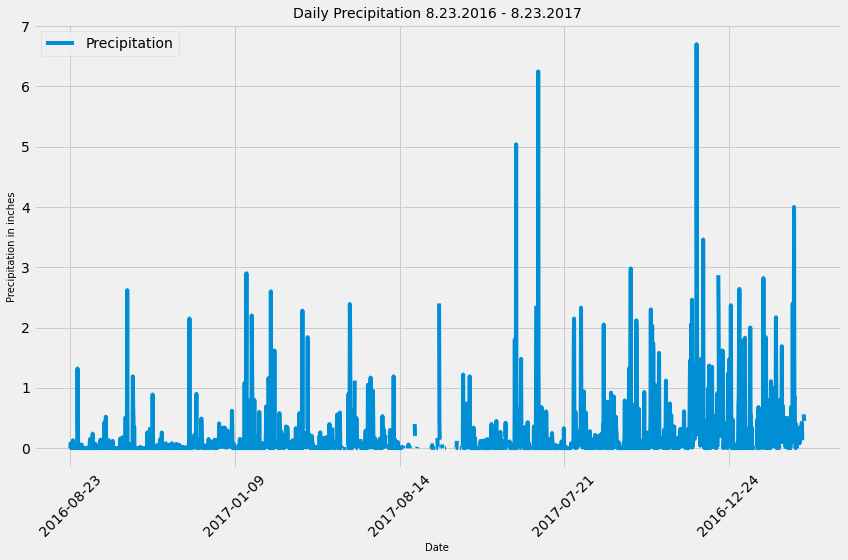

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(figsize = (12,8))
plt.title("Daily Precipitation 8.23.2016 - 8.23.2017", fontsize=14)
plt.xlabel("Date", fontsize=10)
plt.ylabel("Precipitation in inches", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary = prcp_df['Precipitation'].describe()
stats = pd.DataFrame(summary)
stats

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(stations).filter(stations.id).count()
total_stations

9

In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurements.station,func.count(measurements.station)).group_by(measurements.station).\
        order_by(func.count(measurements.station).desc()).all()

for station in active_stations:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]
print(most_active_station)

USC00519281


In [21]:
# Using the most active station id
sel = [measurements.station, 
       stations.name, 
       func.min(measurements.tobs), 
       func.max(measurements.tobs), 
       func.avg(measurements.tobs)]

session.query(*sel).filter(measurements.station == 'USC00519281').all()

/Users/nepanji/opt/anaconda3/lib/python3.8/site-packages/sqlalchemy/sql/compiler.py:362: SAWarning: SELECT statement has a cartesian product between FROM element(s) "station" and FROM element "measurement".  Apply join condition(s) between each element to resolve.
  util.warn(message)


[('USC00519281', 'WAIKIKI 717.2, HI US', 54.0, 85.0, 71.66378066378067)]

In [22]:
# Query the last 12 months of temperature observation data for this station
session.query(measurements.station, measurements.tobs).\
    filter(measurements.station == 'USC00519281').\
    filter(measurements.date >= year_ago).all()



[('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281',

In [23]:
# Save the query results as a Pandas DataFrame
temps = session.query(measurements.tobs).\
    filter(measurements.station == 'USC00519281').\
    filter(measurements.date >= year_ago).order_by(measurements.tobs).all()
temps

[(59.0,),
 (59.0,),
 (59.0,),
 (60.0,),
 (60.0,),
 (61.0,),
 (62.0,),
 (62.0,),
 (62.0,),
 (62.0,),
 (62.0,),
 (62.0,),
 (63.0,),
 (63.0,),
 (63.0,),
 (63.0,),
 (64.0,),
 (64.0,),
 (64.0,),
 (65.0,),
 (65.0,),
 (65.0,),
 (65.0,),
 (65.0,),
 (65.0,),
 (65.0,),
 (66.0,),
 (66.0,),
 (66.0,),
 (66.0,),
 (66.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (67.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (70.0,),
 (71.0,),


In [24]:
temps_df = pd.DataFrame(temps,columns = ['tobs'])
temps_df = temps_df.rename(columns = {'tobs':'Temperature'})

temps_df.head()

,Temperature
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0


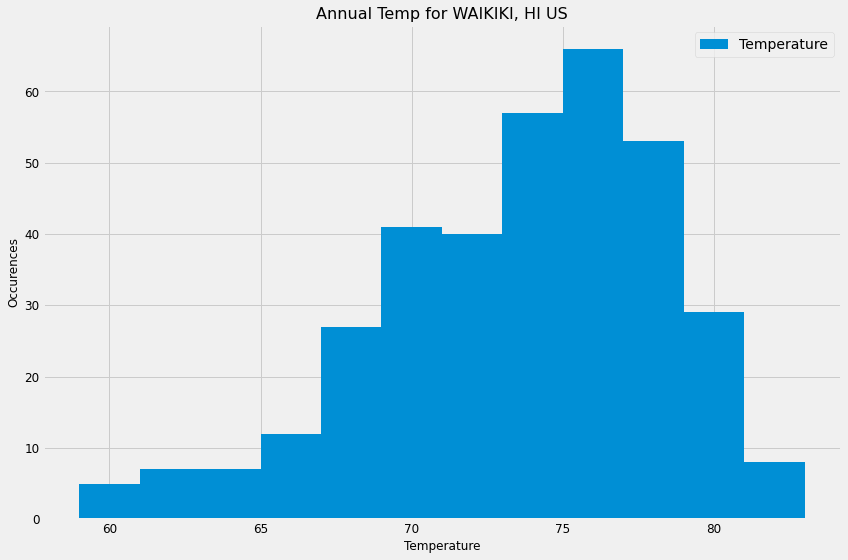

In [31]:
# plot the results as a histogram
temps_df.plot.hist(figsize=(12,8), bins=12, legend=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Temperature", fontsize=12)
plt.ylabel("Occurences", fontsize=12)
plt.title("Annual Temp for WAIKIKI, HI US", fontsize=16)
plt.tight_layout()
plt.show()

# Close session

In [26]:
# Close Session
session.close()